# Deep Learning Features at Scale for Visual Place Recognition
### Implementation in python using keras

In [2]:
#Importing Libraries
from PIL import Image # used for loading images
import numpy as np
import os # used for navigating to image path
from random import shuffle
import matplotlib.pyplot as plt
import tensorflow as tf
# keras imports for the dataset and building our neural network
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPool2D
from keras.layers. normalization import BatchNormalization
from keras.utils import np_utils

# splitting function from sklearn
from sklearn.model_selection import train_test_split

# Function to load image dataset

In [3]:
DIR = 'C:../Pictures/smalldataset/'
img_type = os.listdir(DIR)
IMG_SIZE = 227

def load_data():
    data = []
    for typ in img_type:
        path_typ = os.path.join(DIR, typ)
        for img in os.listdir(path_typ):
            label = typ
            path = os.path.join(path_typ, img)
            img = Image.open(path)
            img = img.convert('L')
            img = img.resize((IMG_SIZE, IMG_SIZE), Image.ANTIALIAS)
            data.append([np.array(img), label])

    shuffle(data)
    return data

In [4]:
data = load_data()

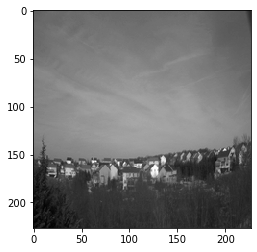

In [5]:
plt.imshow(data[13][0], cmap = 'gist_gray')

# Spliting data set into train and test sets

In [6]:
X = np.array([i[0] for i in data]).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y = np.array([i[1] for i in data])

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,
                                                random_state=42)

In [8]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(1024, 227, 227, 1)
(256, 227, 227, 1)
(1024,)
(256,)


# Normalizing and one hotencoding the data set

In [9]:
# normalizing the data to help with the training
#X_train /= 255
#X_test /= 255

# one-hot encoding using keras' numpy-related utilities
#n_classes = 2543
n_classes = 3
print("Shape before one-hot encoding: ", y_train.shape)
y_train = np_utils.to_categorical(y_train, n_classes)

print("Shape before one-hot encoding: ", y_test.shape)
y_test = np_utils.to_categorical(y_test, n_classes)


Shape before one-hot encoding:  (1024,)
Shape before one-hot encoding:  (256,)


In [10]:
# building a linear stack of layers with the sequential model
model = Sequential()

# convolutional layer 1
model.add(Conv2D(96, kernel_size=(11,11), strides=4, activation='relu', input_shape=(227, 227, 1)))
model.add(MaxPool2D(pool_size=(3,3)))
model.add(BatchNormalization())

# convolutional layer 2
model.add(Conv2D(256, kernel_size=(5, 5), strides=(1, 1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(3,3)))
#model.add(Dropout(0.25))
model.add(BatchNormalization())

# convolutional layer 3
model.add(Conv2D(384, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu'))
#model.add(MaxPool2D(pool_size=(3,3)))
#model.add(Dropout(0.25))
model.add(BatchNormalization())

# convolutional layer 4
model.add(Conv2D(384, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu'))
#model.add(MaxPool2D(pool_size=(3,3)))
#model.add(Dropout(0.25))
model.add(BatchNormalization())

# convolutional layer 5
model.add(Conv2D(256, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu'))
#model.add(MaxPool2D(pool_size=(3,3)))
#model.add(Dropout(0.25))
model.add(BatchNormalization())

# convolutional layer 6
model.add(Conv2D(256, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(3,3)))
#model.add(Dropout(0.25))
model.add(BatchNormalization())


# flatten output of conv
model.add(Flatten())

# hidden layer
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))

# output layer
model.add(Dense(3, activation='softmax'))
#model.add(Dropout(0.3))

#Optimizer used is sgd
opt = keras.optimizers.SGD(lr=0.01, momentum=0.9, decay= 0.005, nesterov=False)

# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=opt)

# training the model for 3 epochs
history = model.fit(X_train, y_train, batch_size=50, epochs=3)

Epoch 1/3
1024/1024 [==============================] - 47s 46ms/step - loss: 0.0739 - accuracy: 0.9688
Epoch 2/3
1024/1024 [==============================] - 50s 49ms/step - loss: 0.0249 - accuracy: 0.9951
Epoch 3/3
1024/1024 [==============================] - 42s 41ms/step - loss: 0.0101 - accuracy: 0.9961


# Model Evaluation

In [11]:
loss, acc = model.evaluate(X_test,y_test, verbose = 0)
print(acc * 100)


47.65625
